## Load required modules

In [1]:
import matplotlib.pyplot as plt
import json
import pickle
import numpy as np
import pprint as pp

from tensorflow.keras.models import model_from_json

2025-02-27 03:47:26.945041: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-27 03:47:26.976256: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-27 03:47:26.976281: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-27 03:47:26.977050: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-27 03:47:26.981913: I tensorflow/core/platform/cpu_feature_guar

## User settings

In [2]:
application_root_directory = '/home/emily/Desktop/projects/test/badass-data-science/badassdatascience/forecasting/deep_learning'
training_run = 'blah----71807266-3119-4e24-b788-f97511b82567'
data_source_root_directory = '/home/emily/Desktop/projects/test/badass-data-science/badassdatascience/forecasting/deep_learning/pipeline_components/output/queries'
data_source_id = '309457bc-a227-4332-8c0b-2cf5dd38749c'

## Initialize

In [3]:
model_training_output_directory = application_root_directory + '/output/'

filename_config_json = model_training_output_directory + '/' + training_run + '_lstm_regressor_config.json'
filename_model_json = model_training_output_directory + '/' + training_run + '_model_regressor.json'
filename_model_final_weights = model_training_output_directory + '/' + training_run + '_final_weights_regressor.pickled'
filename_history = model_training_output_directory + '/' + training_run + '_final_history_regressor.pickled'

filename_train_val_test_data = data_source_root_directory + '/full_train_val_test_' + data_source_id + '.pickled'

## Define function to load the configuration used for training the model

In [4]:
def load_training_run_config(filename_config_json):
    with open(filename_config_json) as fff:
        config = json.load(fff)
    return config

## Define function to load the trained model

In [5]:
def load_model(filename_model_json, filename_model_final_weights):
    with open(filename_model_json, 'r') as json_file:
        loaded_model_json = json_file.read()

    # Create a new model from the JSON
    model = model_from_json(loaded_model_json)

    # Load the weights into the new model
    model.load_weights(filename_model_final_weights)

    return model

## Define function to load the training history

In [6]:
def load_training_history(filename_history):
    try:
        with open(filename_history, 'rb') as fff:
            history = pickle.load(fff)
    except Exception as exception:
        print(exception)
        sys.exit(-1)
    return history  

## Define function to plot training loss function

In [7]:
def plot_basic_loss(history, config, metric_base = 'loss', ylabel = 'Loss'):
    epochs = range(1, len(history[metric_base]) + 1)

    plt.figure()
    plt.plot(epochs, history[metric_base], '-.', label = ylabel)
    plt.plot(epochs, history['val_' + metric_base], '-.', label = 'Validation ' + ylabel)
    plt.xlabel('Training Epoch')
    
    plt.ylabel(ylabel)
    plt.title('Training Run: ' + training_run.split('----')[-1] + '\nBatch Size = ' + str(config['batch_size']))
    
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.close()

## Define function to load the training, validation and testing sets

In [8]:
def load_train_val_test_data(filename_train_val_test):
    with open(filename_train_val_test_data, 'rb') as fff:
        train_val_test_dict = pickle.load(fff)
    return train_val_test_dict

## Define function to predict results using the model

In [9]:
def predict(X, model):
    y_predicted = model.predict(X)
    return y_predicted

## Define function to plot a given forecast

In [10]:
def plot_a_forecast(X, y_known, y_predicted, y_forward, model, index = 20, predictor_line = 0):

    indices = np.arange(0, X[index].shape[0])
    indices_forward = np.arange(len(indices), len(indices) + len(y_forward[index, :]))

    X_mean = np.mean(X[index, :, predictor_line])

    y_predicted_min = y_predicted[index, 0]
    y_predicted_mean = y_predicted[index, 1]  # check index of n = 1
    y_predicted_median = y_predicted[index, 2]  # check index of n = 1
    y_predicted_max = y_predicted[index, 3]
    
    plt.figure()
    plt.plot(indices, X[index, :, predictor_line])
    plt.plot(indices, [X_mean] * len(indices))
    
    plt.plot(indices_forward, y_forward[index, :])
    plt.plot(indices_forward, [y_predicted_min] * len(indices_forward))
    plt.plot(indices_forward, [y_predicted_mean] * len(indices_forward))
    plt.plot(indices_forward, [y_predicted_median] * len(indices_forward))
    plt.plot(indices_forward, [y_predicted_max] * len(indices_forward))
    
    plt.show()
    plt.close()

## Load and display the training configuration file

In [11]:
config = load_training_run_config(filename_config_json)

In [12]:
pp.pprint(config)

{'batch_normalization_momentum': 0.9,
 'batch_size': 128,
 'calculated_input_shape': [180, 6],
 'calculated_number_of_outputs': 4,
 'callbacks_dict': {'ReduceLROnPlateau': {'factor': 0.9,
                                          'monitor': 'val_loss',
                                          'patience': 4}},
 'checkpoint_file_path': '/home/emily/Desktop/projects/test/badass-data-science/badassdatascience/forecasting/deep_learning/output/blah----71807266-3119-4e24-b788-f97511b82567_regressor_model_checkpoints.keras',
 'data_source_path': '/home/emily/Desktop/projects/test/badass-data-science/badassdatascience/forecasting/deep_learning/output',
 'dense_activation_function': 'LeakyReLU',
 'dense_dropout_rate': 0.25,
 'early_stopping_monitor': 'loss',
 'early_stopping_patience': 15,
 'epochs': 200,
 'final_dense_activation_function': 'LeakyReLU',
 'json_config_output_path': '/home/emily/Desktop/projects/test/badass-data-science/badassdatascience/forecasting/deep_learning/output/blah----7

## Load the trained model

In [13]:
model = load_model(filename_model_json, filename_model_final_weights)

2025-02-27 03:47:28.700378: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 529 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 SUPER, pci bus id: 0000:65:00.0, compute capability: 7.5
2025-02-27 03:47:28.776527: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


## Load and plot the training history

In [14]:
history = load_training_history(filename_history)

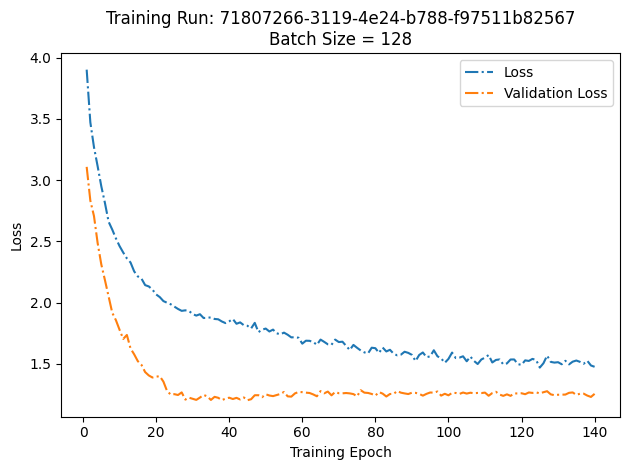

In [15]:
plot_basic_loss(history, config)

## Load the training, validation and testing data

In [16]:
train_val_test_dict = load_train_val_test_data(filename_train_val_test_data)

## Predict the y values for the test set

In [17]:
y_predicted = predict(train_val_test_dict['test']['X'], model)

2454/2454 [==============================] - 261s 106ms/step


## Plot a forecast

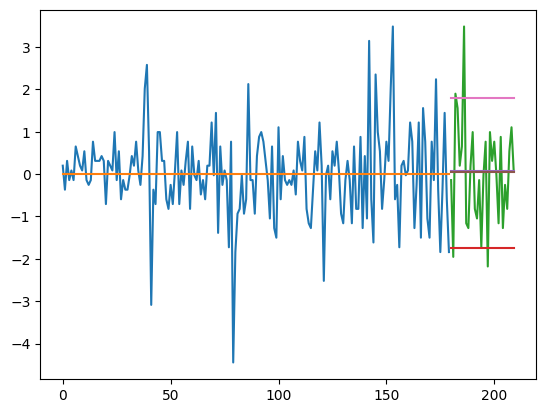

In [18]:
plot_a_forecast(
    train_val_test_dict['test']['X'],
    train_val_test_dict['test'][config['y_set']],
    y_predicted,
    train_val_test_dict['test'][config['y_forward_set']],
    model,
)